# Introduction

Welcome to the py-capella-mbse Showcase notebook. This notebook will show you some basic (and not so basic) things that you can get done using this library. For more advanced features have a look around the nearby notebooks.

The below code loads the library and one of the test models:

In [1]:
import capellambse
path_to_model = "C:/Users/kimla/Documents/Capella/workspace/RegolithO2ExtractionDemonstrator/RegolithO2ExtractionDemonstrator.aird"
model = capellambse.MelodyModel(path_to_model)
model

Cannot load PVMT extension: ValueError: Provided model does not have a PropertyValuePkg
Property values are not available in this model


Please ignore the warning above - it indicates that we probed the model for the PVMT extension and it wasn't there, so PVMT-related features will not be available. In some not so distant future this may disapear as we'll be able to inject PVMT into models, but for now, if you want to use PVMT-related features you need to enable PVMT for that model in Capella.

Having said that, lets go to the first practical example of working with the library!

## Example 1: Actor functions

The below code will print every Actor available in the Logical Architecture layer

In [5]:
for actor in model.la.all_actors:
    print(actor.name)

Excavation System
Spacecraft
SC Propulsion System
SC Communication System
SC OBC
SC Power System
Ground Control
Environment
Space Environment
Lunar Environment
Lunar Ground
Sun
Lunar Atmosphere


but we could also "zoom-in" to an actor of interest:

In [8]:
model.la.all_actors.by_name("Spacecraft")

components,"LogicalComponent ""SC Propulsion System"" (8d1f97ad-f9e8-47d2-8190-d3a71a63a57f)LogicalComponent ""SC Communication System"" (80192d79-15dc-4a8f-8ca0-6bb4ca162e86)LogicalComponent ""SC OBC"" (35bc71c5-454b-4573-8fbc-4ae6c030dca7)LogicalComponent ""SC Power System"" (7f741a04-452e-48e6-9122-ed1f42574408)"
constraints,(Empty list)
description,None
diagrams,(Empty list)
functions,(Empty list)
is_abstract,False
is_actor,True
is_human,False
name,Spacecraft
owner,"LogicalComponentPkg ""Structure"" (b2713f45-3acb-4b79-a7ff-436cece2b2d8)"
parts,"Part ""Spacecraft"" (4168e6af-6e12-48a3-b821-0759ae3bc4f9)"


We can also turn the above data into a table, for example "actor function allocation", using `pandas`.

For this, we first make sure pandas itself is installed, as well as an extension we'll use later.

In [9]:
!pip install -q pandas openpyxl

You should consider upgrading via the 'c:\users\kimla\documents\capella\python4capella\py-capellambse\.venv\scripts\python.exe -m pip install --upgrade pip' command.


Now we can use it together with `capellambse`:

In [10]:
import pandas as pd

data = []
for actor in model.la.all_actors:
    actor_functions = "; ".join([function.name for function in actor.functions] or ["no functions assigned"])
    data.append(dict(actor=actor.name, functions=actor_functions))
df = pd.DataFrame(data)
df

,actor,functions
0,Excavation System,Drill Regolith; Provide Unprocessed Regolith
1,Spacecraft,no functions assigned
2,SC Propulsion System,Transport to the Moon; Provide Launcher Enviro...
3,SC Communication System,Receive Drilling Control Order; Receive Spacec...
4,SC OBC,Monitor Drilling; Handle Spacecraft Control; H...
5,SC Power System,Provide Drilling Power; Provide Electrical Pow...
6,Ground Control,Operate Spacecraft from Ground; Operate Drill ...
7,Environment,no functions assigned
8,Space Environment,Provide Space Radiations
9,Lunar Environment,no functions assigned


and any `pandas.DataFrame` can always be turned into an Excel Spreadsheet, just like that:

In [12]:
df.to_excel("01_intro_actor_functions.xlsx")

you can check the resulting file in the folder next to this notebook (right after you run the above cell)

Now that we've seen the basics, lets do something visually cool.

## Example 2: working with diagrams

The below code will find some diagrams for us.

In [11]:
for diagram in model.la.diagrams.by_type('SAB'):
    print(diagram.name)

We can analyze which model objects are shown in a particular diagram.

In [17]:
diagram = model.diagrams.by_name('[SAB] O2Extractor - SF 2nd level')
diagram.nodes

Unknown composite filter 'hide.allocated.functional.exchanges.filter' on object '_4tNaQFRYEeyyLounhgaE_g'
Unknown composite filter 'hide.allocated.functional.exchanges.filter' on object '_4tNaSVRYEeyyLounhgaE_g'
Unknown composite filter 'hide.allocated.functional.exchanges.filter' on object '_4tP2jVRYEeyyLounhgaE_g'
Unknown composite filter 'hide.allocated.functional.exchanges.filter' on object '_4tP2llRYEeyyLounhgaE_g'
Unknown composite filter 'hide.allocated.functional.exchanges.filter' on object '_4tQdmFRYEeyyLounhgaE_g'
Unknown composite filter 'hide.allocated.functional.exchanges.filter' on object '_4tOobVRYEeyyLounhgaE_g'
Unknown composite filter 'hide.allocated.functional.exchanges.filter' on object '_4tOodlRYEeyyLounhgaE_g'
Unknown composite filter 'hide.allocated.functional.exchanges.filter' on object '_4tPPgVRYEeyyLounhgaE_g'
Unknown composite filter 'hide.allocated.functional.exchanges.filter' on object '_4tRrsFRYEeyyLounhgaE_g'
Unknown composite filter 'hide.allocated.funct

<MixedElementList at 0x0000021BCC6FC580 [<FunctionOutputPort 'FOP 3' (e1f1202d-3f44-4a41-9006-4354cd4272cb)>, <FunctionalExchange 'SystemTemperatureOrder' (0cc404d2-243b-4d16-a410-cc52741ef03d)>, <FunctionInputPort 'FIP 1' (a26373ac-b05a-472a-94c7-1699c745ed65)>, <Part 'Ground Control' (59a9c729-ec30-49c9-b0b7-7ef8d420d47b)>, <FunctionInputPort 'FIP 1' (20fbe9a7-d5f4-4b93-a599-5555ac83566c)>, <FunctionOutputPort 'FOP 1' (e3ebe98a-f161-44e9-a97c-a98ae87eaccd)>, <SystemFunction 'Provide Space Environment' (39fc4992-8a48-410d-846f-007ad0561a6c)>, <FunctionInputPort 'FIP 2' (6c990958-c20e-4393-a351-6804a9c567ca)>, <FunctionOutputPort 'FOP 4' (d239a968-3a98-4dae-95c1-a4c493cfe92e)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (e46d89af-87e9-425d-8cc7-b0f844955732)>, <FunctionalExchange 'DrillingGroundOrder' (d4a17032-f2b2-417c-8d2f-1684629805a6)>, <FunctionInputPort 'FIP 5' (a036813c-385d-4835-907b-5ed277f315d8)>, <FunctionInputPort 'FIP 5' (1174b2a4-f480-420e-a21b-472e5c7e5617)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (e5e1ffcc-8941-42dc-be0e-b98fe2db6026)>, <FunctionInputPort 'FIP 1' (3e60cffe-8a96-44a1-9b35-7cb200b09ce8)>, <FunctionalExchange 'ImpureOxygen' (b1ba7f5c-5c73-4af3-8f41-d0b6c08d2a62)>, <ComponentPort 'CP 2' (0beb1fd5-c62f-4bc4-9563-e1b307301c1e)>, <FunctionOutputPort 'FOP 2' (5ce5488b-e0e7-42b4-8561-5136d1e99098)>, <FunctionInputPort 'FIP 1' (0cfc2924-623f-483e-9b3c-04a33a6eb472)>, <Part 'SC Propulsion System' (fb58a8a3-7133-4a01-9223-340af195f0f6)>, <FunctionOutputPort 'FOP 4' (130a1a06-2936-4783-8c57-1485d0511fbc)>, <FunctionInputPort 'FIP 1' (ed42fab2-c457-45a9-90fa-d6440b0b0700)>, <FunctionalExchange 'SpacecraftPowerForStoragePressure' (0e7b249b-3d8d-4c57-ad3e-0876e82a0159)>, <SystemFunction 'Control Storage' (ada1a010-2f39-42ac-89ff-c79a40387170)>, <FunctionalChain 'Monitoring Chain' (f8b2e542-77c7-47e6-b4e2-56b9ff3c1bf4)>, <FunctionalExchange 'StorageTemperature' (60defaee-ccf1-4567-a6ca-da6d0bc524f3)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (448d3957-3bf2-4742-964f-db4c3f37c827)>, <FunctionalExchange 'DrillingOrder' (e7bf3daf-4483-4d57-a3d4-2c6c4bb72db0)>, <FunctionInputPort 'inDrilling Order' (8a995fd2-2fa2-49e0-88c1-7606c1a73b8c)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (0399baa0-bd73-46e0-9d96-6065595495c1)>, <FunctionOutputPort 'FOP 2' (48d426bd-ec3f-47fc-ae8c-ae6c6e58ba92)>, <FunctionInputPort 'FIP 1' (2e9ffcec-88a9-48f4-8c5d-914f79252bbb)>, <FunctionalChain 'Control Chain' (b30de2fd-76fe-45c6-99e3-1c01b6761f70)>, <FunctionInputPort 'FIP 4' (2b728d9c-51a9-4cd0-b0c6-c850d8c39f29)>, <FunctionalExchange 'PowerForWasteTransfer' (1baa195c-a771-4e53-9de3-d3fc2d42a14f)>, <FunctionOutputPort 'outSpacecraftData' (954800c6-e2ac-4844-90b0-9ae7514652a5)>, <SystemFunction 'Produce Transportation Power' (0515c28e-eb4e-4e5a-8e69-a8c6cdcaa1f0)>, <FunctionOutputPort 'FOP 1' (ea9a97b8-9e32-41c5-8b8a-f0757432dbdc)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (bad76e9b-d7e5-45f0-8e70-3d006e936cca)>, <Model element (org.polarsys.capella.core.data.information:PortAllocation) '(Unnamed org.polarsys.capella.core.data.information:PortAllocation)' (ba265d85-c561-4479-85bc-2b474a74f3f3)>, <ComponentPort 'CP 3' (526afe64-dbd8-423d-890f-f422074ba7ac)>, <FunctionalExchange 'SystemTemperatureData' (981ad946-e20f-4247-b85a-39a648238b99)>, <FunctionOutputPort 'FOP 1' (dcbda2ad-1595-46ad-a7f0-996ca1c9440a)>, <FunctionOutputPort 'FOP 1' (b649d097-fd39-42c1-8b00-22174d59cb49)>, <FunctionOutputPort 'FOP 1' (84292cb1-2829-4e5a-b764

And again there are warnings - there are quite a few visual filters in Capella and we are not handling all of those yet but mostly those that are used in our projects. The filter coverage will eventally improve, stay tuned.

And finally, you can display the diagram right in the notebook.

No styling defined for diagram class System Architecture Blank
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System A

No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture 

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default styl

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No defau

No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No defau

No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'Sy

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.

No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT'

No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture 

No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'B

No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture 

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No defau

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No defau

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'Syste

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture

No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.

No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' i

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edg

No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edg

No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No d

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'Sys

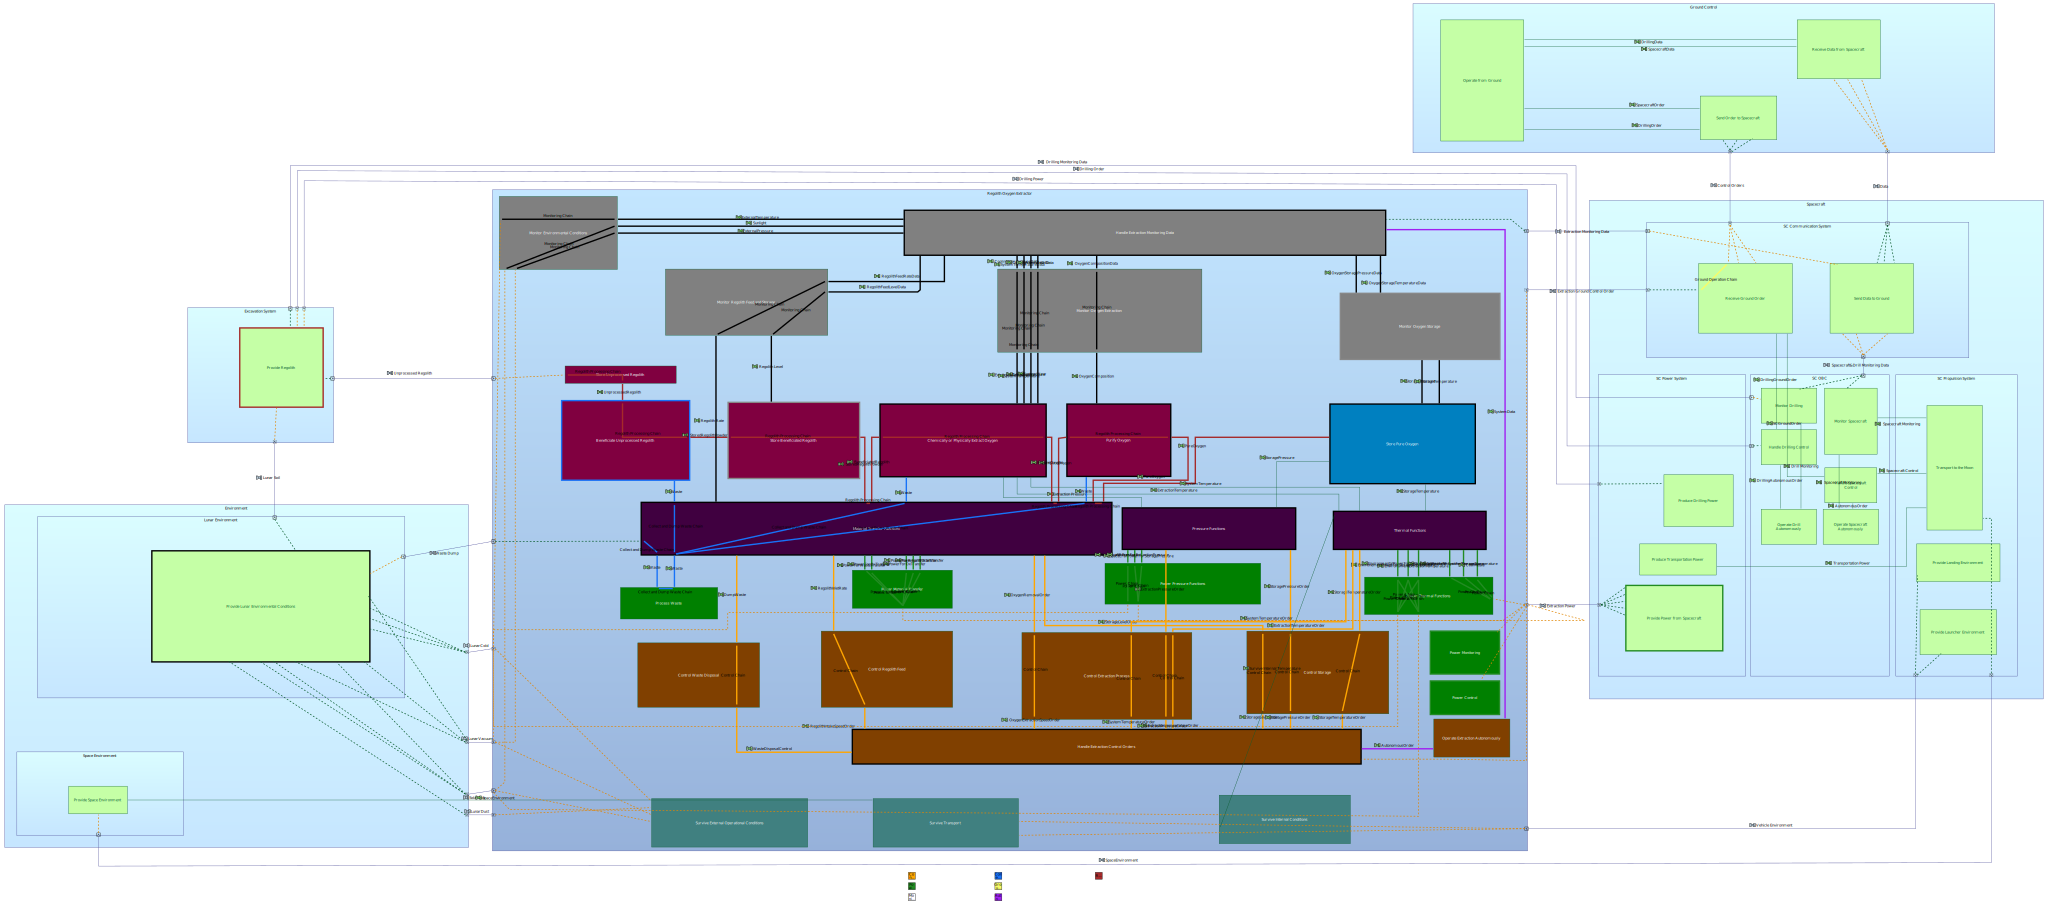

In [18]:
diagram

We use SVG diagrams a lot since they look great in documentation, are zoomable, even interactive sometimes and really light-weight. To make integrating them into a pipeline easier, we also support some derived formats, which you can access using `.as_<format>` style attributes, see below for a handful of useful examples.

If you need an entirely different format from SVG, such as PNG or JPEG, there are quite a few examples of how to get there on stackoverflow (like [Convert SVG to PNG in Python](https://stackoverflow.com/questions/6589358/convert-svg-to-png-in-python)).

In [21]:
print(diagram.as_svg[:110] + "...")  # The raw SVG format as simple python `str`
print(diagram.as_datauri_svg[:110] + "...")  # An SVG, base64-encoded as `data:` URI
print(diagram.as_html_img[:110] + "...")  # An HTML `<img>` tag, using the above `data:` URI as `src`

open('SAB_LLF.svg', 'w').write(diagram.as_svg)

No styling defined for diagram class System Architecture Blank
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemComponent' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System A

No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture 

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default styl

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No defau

No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No defau

No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'Sy

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.

No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT'

No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture 

No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'B

No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture 

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No defau

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No defau

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'Syste

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture

No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.

No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' i

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edg

No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edg

No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No d

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'Sys

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style 

No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExc

No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'Syste

No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.

No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.Func

No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edg

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edg

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style fo

No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edg

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No defau

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default styl

data:image/svg+xml;base64,PHN2ZyBiYXNlUHJvZmlsZT0iZnVsbCIgY2xhc3M9IlN5c3RlbUFyY2hpdGVjdHVyZUJsYW5rIiBoZWlnaHQ9...


No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunct

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No defau

No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No defau

No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.

No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'Sy

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'S

No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture 

No default style for 'Box.CP_IN' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.CP_OUT' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemActor' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.SystemFunction' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture 

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FIP' in 'System Architecture Blank'
No defau

No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No default style for 'Box.FOP' in 'System Architecture Blank'
No defau

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'

No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' i

No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FOPAllocation' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExchange' in 'System Architecture Blank'
No default style for 'Edge.ComponentExc

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
N

No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edg

No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No defa

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Architecture Blank'
No default style for 'Edge.FunctionalExchange' in 'System Archit

No default style for 'Edge.FIPAllocation' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'
No default style for 'Edge.FunctionalChain' in 'System Architecture Blank'


187576

This concludes our introduction. There is a lot more you can do with the library - feel free to explore the examples collection or create an issue to ask for a specific use-case example and you may see it around pretty soon.